### **Introduction:**

**Advertising data** refers to information collected and analyzed from various sources to understand and optimize advertising campaigns. It encompasses data related to **audience demographics**, **behavior**, **preferences**, and **engagement with ads**. Let's delve into this topic further:

1. **Definition**:
   - **Advertising** consists of all activities involved in presenting a **non-personal**, **sponsor-identified**, **paid-for message** about a product or organization to an audience.
   - It's a way to turn minds toward a product or service, using various channels such as print, digital, television, and radio.

2. **Datasets**:
   - One popular dataset for studying advertising effectiveness is the **Advertising.csv** dataset available on Kaggle.
   - This dataset includes information on **sales** of a product across **200 different markets**, along with the **advertising budgets** for the product in each market across three different media channels.
   - The media channels considered are **TV**, **radio**, and **newspaper**.

3. **Applications**:
   - Advertising data helps marketers make informed decisions by analyzing the impact of different advertising strategies.
   - It aids in **targeting specific audiences**, **measuring campaign success**, and **allocating budgets effectively**.

Remember, effective advertising involves understanding your audience, tailoring messages, and optimizing ad placements to achieve desired outcomes!



### **Problem Statement**

 The **problem statement** for the **advertising dataset** revolves around building a model that predicts **sales** based on the money spent on different marketing platforms. Specifically, we want to analyze the relationship between **TV advertising** and **sales** using a **simple linear regression model**. Here are the key points:

1. **Problem Statement**:
   - **Build a model** that predicts **sales**.
   - **Predictions** will be based on the **expenditure** across various advertising platforms.
   - The goal is to understand how different advertising channels impact sales.

2. **Dataset**:
   - The dataset contains information on **TV**, **radio**, and **newspaper advertising budgets**, along with corresponding **sales figures** across **200 different markets**.
   - Our focus will be on the relationship between **TV advertising** and **sales**.

3. **Approach**:
   - We'll perform a **simple linear regression analysis** using **TV advertising** as the **predictor variable**.
   - By understanding how changes in TV ad spending impact sales, we can make informed decisions about resource allocation in marketing campaigns.

Remember, this analysis helps marketers optimize their advertising strategies and allocate budgets effectively!



### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")
                              # Warnings will appear only once


### **Upload the file**

In [ ]:
df_advertise=pd.read_csv("/content/Advertising.csv",index_col=0)

In [ ]:
df_advertise.head()   # by default it displays top 5 records

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df_advertise.tail()  # by default it displays bottom 5 records

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [ ]:
print('Data shape',df_advertise.shape)    # displays shape of the data
print('No.of Columns',df_advertise.columns)   # displays columns of the data

Data shape (200, 4)
No.of Columns Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [ ]:
df_advertise.describe()   # Shows the stastical information about continuous variables

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Observations:**  

- The **average** value of **sales** is **14k** units.

- The **maximum** value of **sales** is **27k** units.

- The **maximum** amount spend on **TV**. **radio** and **newspaper** is found to be **296**, **50** and **114** dollars respectively

- The **least** amount on advertising is spend on **radio**


In [ ]:
df_advertise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Observations:**
- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

In [ ]:
df_advertise[df_advertise.duplicated()]  # to find out the duplicated records

,TV,Radio,Newspaper,Sales


### **Pre_Profiling  Report**
- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
#profile = ProfileReport(df = df_advertise)
#profile.to_file(outputfile = 'Pre Profiling Report.html')
#print('Accomplished!')

In [ ]:
 #from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
 #files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

In [ ]:
df_advertise.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
df_advertise.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

**Observation:**

- Report show that there are **4 features** which **are numerical**.

- There are **no missing values**.

- **TV** has the most unique values

- No **duplicates** has been found.

- The minimum **sale** is **1.6** units which happened only once.  

- _Sales_ seems to be __normally distributed__.


- Spending on _newspaper advertisement_ seems to be __right skewed__.


- Most of the spends on _newspaper_ is __fairly low__ where as spend on _radio and tv_ seems to be __uniformly distributed__.


- Spends on _tv_ are __comparatively higher__ than spend on _radio and newspaper_.

- For full details checkout the report.

### **Exploratory Data Analysis**

#### **1.How does TV advertising spending impact sales?**

In [ ]:
df_advertise.groupby(by=['TV'])['Sales'].mean().sort_values(ascending=False)

TV
276.9    27.0
287.6    26.2
283.6    25.5
289.7    25.4
266.9    25.4
         ... 
13.1      5.3
5.4       5.3
8.6       4.8
4.1       3.2
0.7       1.6
Name: Sales, Length: 190, dtype: float64

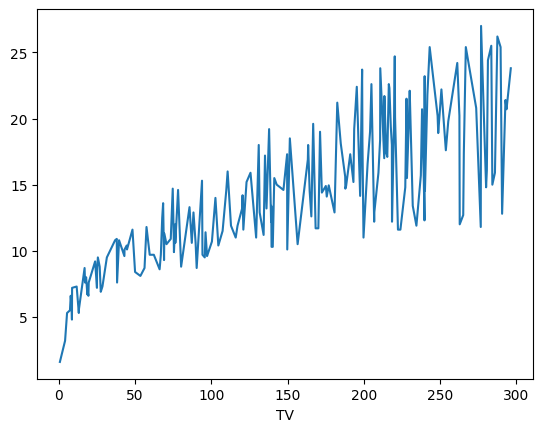

In [ ]:
df_advertise.groupby(by=['TV'])['Sales'].mean().plot()
plt.show()

**Observations:** Investigate the relationship between TV ad spending and sales using linear regression.

#### **2.Is there a correlation between radio advertising and sales?**

In [ ]:
corr = df_advertise['Radio'].corr(df_advertise['Sales'])
print(f"Correlation between radio advertising and sales: {corr}")

Correlation between radio advertising and sales: 0.5762225745710551


#### **3.What is the effect of newspaper advertising on sales?**

Correlation between newspaper advertising and sales: 0.22829902637616528


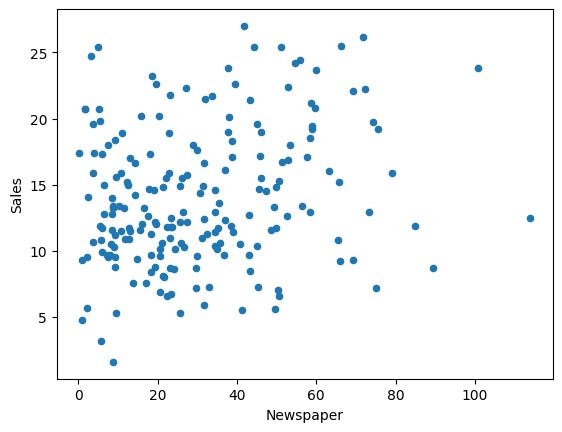

In [ ]:
# Calculate the correlation between newspaper advertising and sales.
corr = df_advertise['Newspaper'].corr(df_advertise['Sales'])
print(f"Correlation between newspaper advertising and sales: {corr}")

# Plot the relationship between newspaper advertising and sales.
df_advertise.plot.scatter(x='Newspaper', y='Sales')
plt.show()

**Observations:**  Impact of newspaper ad spending on sales.

#### **4.Which advertising medium (TV, radio, or newspaper) has the strongest influence on sales?**

In [ ]:
# Calculate the correlation between each advertising medium and sales.
tv_corr = df_advertise['TV'].corr(df_advertise['Sales'])
radio_corr = df_advertise['Radio'].corr(df_advertise['Sales'])
newspaper_corr = df_advertise['Newspaper'].corr(df_advertise['Sales'])

# Print the correlations.
print(f"Correlation between TV advertising and sales: {tv_corr}")
print(f"Correlation between radio advertising and sales: {radio_corr}")
print(f"Correlation between newspaper advertising and sales: {newspaper_corr}")

# Based on the correlations, determine which advertising medium has the strongest influence on sales.
if tv_corr > radio_corr and tv_corr > newspaper_corr:
  print("TV advertising has the strongest influence on sales.")
elif radio_corr > tv_corr and radio_corr > newspaper_corr:
  print("Radio advertising has the strongest influence on sales.")
else:
  print("Newspaper advertising has the strongest influence on sales.")

Correlation between TV advertising and sales: 0.7822244248616061
Correlation between radio advertising and sales: 0.5762225745710551
Correlation between newspaper advertising and sales: 0.22829902637616528
TV advertising has the strongest influence on sales.


#### **5.Can we predict sales based on a combination of TV, radio, and newspaper advertising?**

R-squared score: 0.8972106381789522


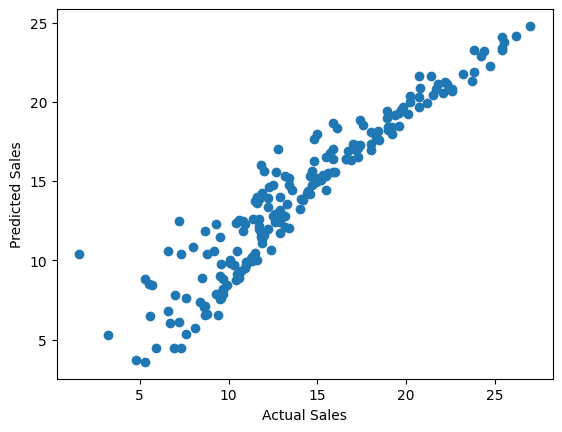

In [ ]:
# prompt: Can we predict sales based on a combination of TV, radio, and newspaper advertising?

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/Advertising.csv", index_col=0)

# Split the data into features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Evaluate the model
print("R-squared score:", model.score(X, y))

# Make predictions
predictions = model.predict(X)

# Plot the actual and predicted sales
plt.scatter(y, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()


#### **6.Are there any outliers in the dataset that significantly affect the relationship between advertising and sales?**

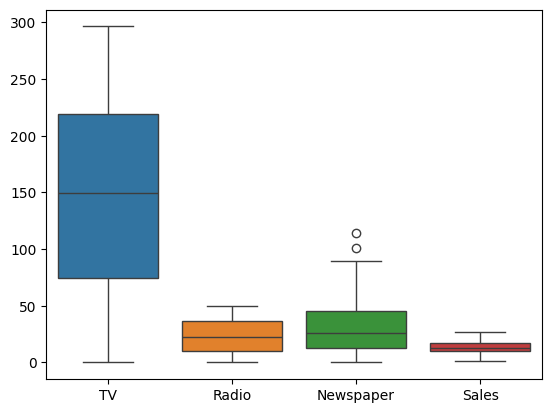

In [ ]:
sns.boxplot(data=df_advertise)
plt.show()

In [ ]:
# Investigate outliers further
outliers = df[((df['TV'] < df['TV'].quantile(0.25)) | (df['TV'] > df['TV'].quantile(0.75))) &
              ((df['Radio'] < df['Radio'].quantile(0.25)) | (df['Radio'] > df['Radio'].quantile(0.75))) &
              ((df['Newspaper'] < df['Newspaper'].quantile(0.25)) | (df['Newspaper'] > df['Newspaper'].quantile(0.75)))]

In [ ]:
outliers

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
3,17.2,45.9,69.3,9.3
6,8.7,48.9,75.0,7.2
9,8.6,2.1,1.0,4.8
17,67.8,36.6,114.0,12.5
18,281.4,39.6,55.8,24.4
36,290.7,4.1,8.5,12.8
37,266.9,43.8,5.0,25.4
62,261.3,42.7,54.7,24.2
66,69.0,9.3,0.9,9.3


#### **7.How well does the linear regression model fit the data?**

In [ ]:
# prompt: How well does the linear regression model fit the data?

# Calculate the R-squared score
r_squared = model.score(X, y)

# Print the R-squared score
print("R-squared score:", r_squared)

# Interpret the R-squared score
if r_squared >= 0.7:
  print("The model fits the data well.")
elif r_squared >= 0.5:
  print("The model fits the data moderately well.")
else:
  print("The model does not fit the data well.")


R-squared score: 0.8972106381789522
The model fits the data well.


#### **8.What is the expected sales value for a given combination of TV, radio, and newspaper ad spending?**

In [ ]:
# prompt: What is the expected sales value for a given combination of TV, radio, and newspaper ad spending?

# Define the advertising spending
tv = 100
radio = 50
newspaper = 30

# Create a DataFrame
data = {'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]}
df_new = pd.DataFrame(data)

# Predict sales
predicted_sales = model.predict(df_new)[0]

# Print the predicted sales value
print("Predicted sales:", predicted_sales)


Predicted sales: 16.910729969635106


#### **9.Is there any interaction effect between different advertising channels?**

In [ ]:
import statsmodels.formula.api as smf

# Fit a linear regression model with interaction terms
model = smf.ols(formula="Sales ~ TV + Radio + Newspaper + TV:Radio + TV:Newspaper + Radio:Newspaper", data=df).fit()

# Print the model summary
print(model.summary())

# Check for significant interaction terms
for term in ['TV:Radio', 'TV:Newspaper', 'Radio:Newspaper']:
  if model.pvalues[term] < 0.05:
    print(f"There is a significant interaction effect between {term.split(':')[0]} and {term.split(':')[1]}.")


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     993.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.68e-142
Time:                        08:13:41   Log-Likelihood:                -267.49
No. Observations:                 200   AIC:                             549.0
Df Residuals:                     193   BIC:                             572.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4602      0.318     

**Observations:**  Explore whether the impact of one medium depends on the presence of others.

#### **10.How sensitive is the model to changes in advertising budgets?**

In [ ]:
# Calculate the elasticity of sales with respect to each advertising channel
elasticities = {}
for channel in ['TV', 'Radio', 'Newspaper']:
  elasticities[channel] = model.params[channel] * df[channel].mean() / df['Sales'].mean()

# Print the elasticities
for channel, elasticity in elasticities.items():
  print(f"Elasticity of sales with respect to {channel}: {elasticity}")

# Interpret the elasticities
for channel, elasticity in elasticities.items():
  if elasticity > 1:
    print(f"Sales are elastic with respect to {channel}.")
  elif elasticity < 1:
    print(f"Sales are inelastic with respect to {channel}.")
  else:
    print(f"Sales are unit elastic with respect to {channel}.")

Elasticity of sales with respect to TV: 0.21315364941257192
Elasticity of sales with respect to Radio: 0.038040624878479215
Elasticity of sales with respect to Newspaper: 0.03711570059068538
Sales are inelastic with respect to TV.
Sales are inelastic with respect to Radio.
Sales are inelastic with respect to Newspaper.


**Observations:**  Conduct sensitivity analysis to understand how variations in ad spending affect sales predictions.

**Is there a relationship between sales and spends on various advertising channels?**

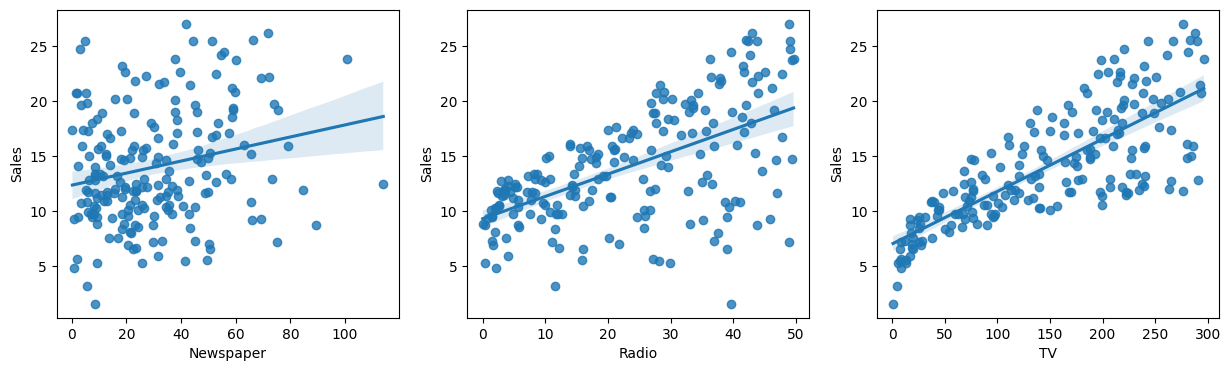

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot the relationship between sales and newspaper advertising
sns.regplot(x="Newspaper", y="Sales", data=df_advertise, ax=axes[0])

# Plot the relationship between sales and radio advertising
sns.regplot(x="Radio", y="Sales", data=df_advertise, ax=axes[1])

# Plot the relationship between sales and TV advertising
sns.regplot(x="TV", y="Sales", data=df_advertise, ax=axes[2])

# Show the plot
plt.show()

**Observations**:- _Sales and spend on newpaper_ is __not__ highly correlaed where as _sales and spend on tv_ is __highly correlated__.

**Visualising Pairwise correlation**

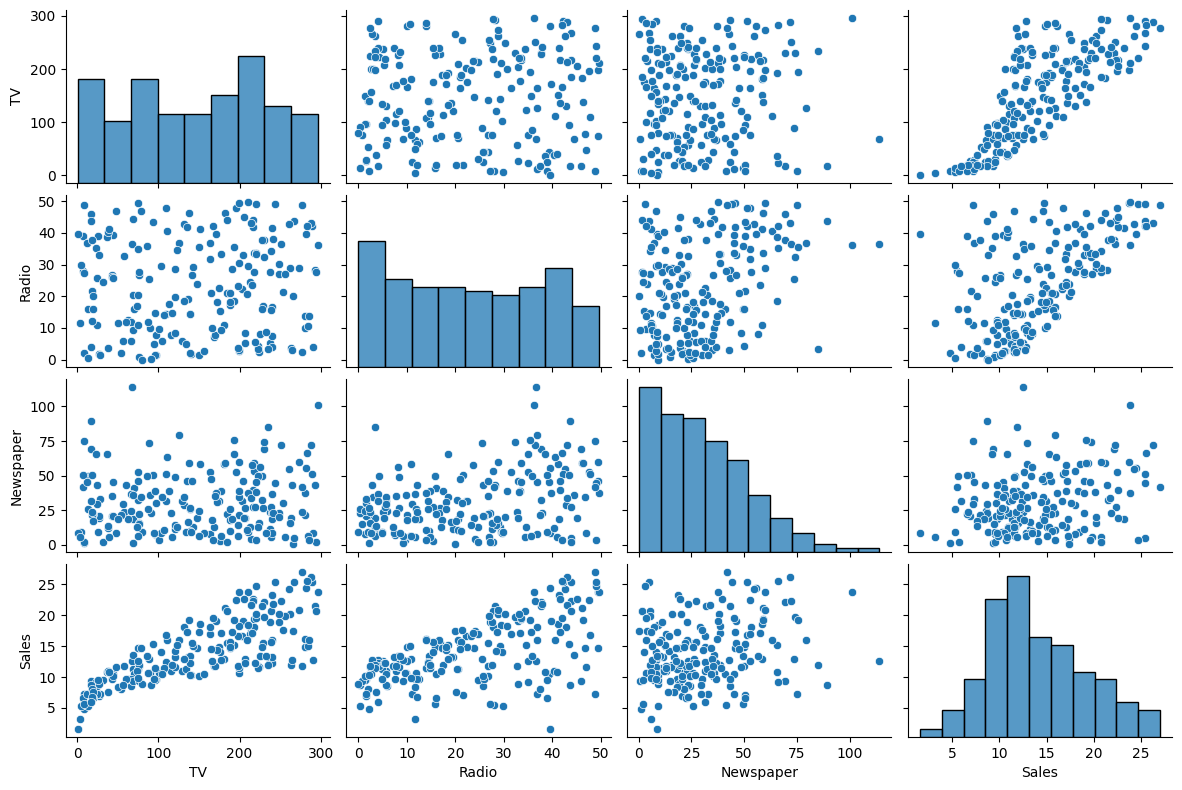

In [ ]:
sns.pairplot(df_advertise,size=2,aspect=1.5)

<Axes: >

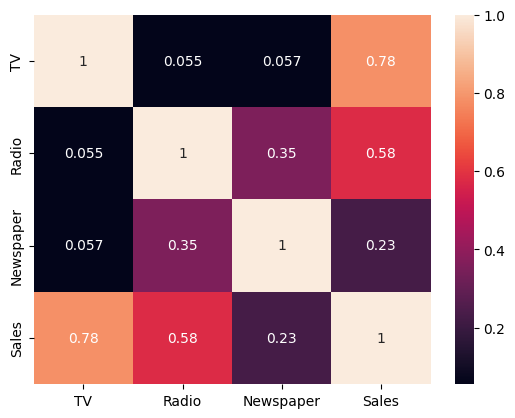

In [ ]:
sns.heatmap(df_advertise.corr(),annot=True)

__Observation__

- **Strong** relationship between **TV ads** and **sales**


- **Weak** relationship between **Radio ads** and **sales**


- **Very weak** to **no** relationship between **Newspaper ads** and **sales**


- **No correlation** between the independent variables **TV** and **Radio** proves the assumption of **Multicollinearity**


- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.


- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.



In [ ]:
df_advertise.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<Axes: ylabel='Frequency'>

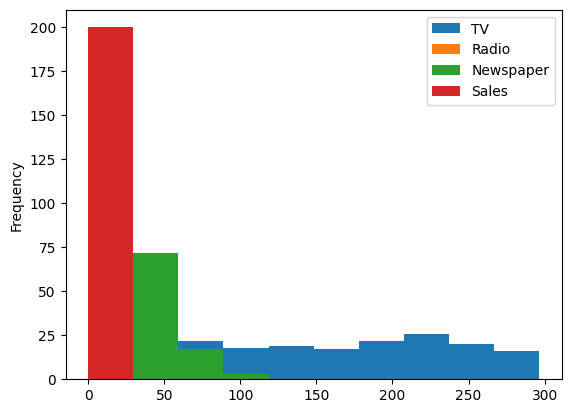

In [ ]:
df_advertise.plot(kind='hist')   # hist plot of data set

### **Post Data Processing**

**Data Standardization:**

__Standardization__
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**.

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(df_advertise)
#data1 = scaler.transform(df_advertise)

In [ ]:
#data = pd.DataFrame(data1)
#data.columns = ['TV','radio','newspaper','sales']
#data.head()

### **Data Preparation:**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [ ]:
x = df_advertise.iloc[:,0:3]   # all rows , tv,radio,newspapaer columns(independent variables)
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y = df_advertise['Sales']     # all rows and only sales column(dependent variable)
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

**Now split our data iinto training and testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
x_test shape:  (40, 3)
y_test shape:  (40,)


In [ ]:
x_train.head()   # Random records for train

,TV,Radio,Newspaper
80,116.0,7.7,23.1
198,177.0,9.3,6.4
39,43.1,26.7,35.1
25,62.3,12.6,18.3
123,224.0,2.4,15.6


In [ ]:
x_test.head()  # Random records for test

,TV,Radio,Newspaper
96,163.3,31.6,52.9
16,195.4,47.7,52.9
31,292.9,28.3,43.2
159,11.7,36.9,45.2
129,220.3,49.0,3.2


### **Model Development:**

- In this section we will **develop Linear Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **MSE**, **MAE** and **RMSE** scores.

- We will do **feature selection** and see if the scores improves.

- We will also add a new categorical feature **Area** and assign values randomly and see if we can improve the scores.

**Linear Regression in scikit-learn**

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. **Load** the `algorithm`

2. **Instantiate** and **Fit** the model to the `training` dataset

3. **Prediction** on the `test` set

4. **Calculating** Root mean square error



In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat=lr.predict(x_test)


In [ ]:
print('Intercept:',lr.intercept_)          # print the intercept
print('Coefficients:',lr.coef_)

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


### **Evaluate the Model**

**Train Accuracy**

In [ ]:
y_hat_train = lr.predict(x_train)

In [ ]:
y_hat_train

array([ 9.68827502, 12.67337707, 10.0553326 ,  8.20010235, 13.49562077,
        5.42585998,  9.2767456 , 14.14222434,  8.83116901, 11.63897134,
       15.42650259, 11.89014523, 12.82693587, 10.82735757,  6.58862301,
        9.93190159,  9.51414822, 24.0815284 ,  7.70552541, 12.49609325,
       17.71880786, 15.28339577, 11.42760282, 10.86633369, 16.78110726,
        6.93551369, 21.35732668,  6.16937955,  9.93897566, 11.52842846,
        9.29612342,  6.59177689, 14.90122344, 17.32216187, 15.80154544,
       16.28133624, 14.94912051, 19.55991189, 13.87795425, 21.04366162,
       12.62381325, 13.80024106,  8.96290787, 17.00702846,  8.41601918,
       15.28340432, 13.72169286, 23.2179245 , 12.53781447, 22.89655202,
        6.7146496 , 18.54942004, 23.38327322, 18.6439566 , 17.1342205 ,
       16.42698672, 12.44666834, 11.82149856, 16.94141141, 14.49733909,
       13.27071976,  7.69340245, 19.22784797,  9.63893927, 19.50751919,
       10.18954107,  7.09983872, 16.69074263, 13.75827407, 15.12

In [ ]:
y_train

80     11.0
198    12.8
39     10.1
25      9.7
123    11.6
       ... 
107     7.2
15     19.0
93     19.4
180    12.6
103    14.8
Name: Sales, Length: 160, dtype: float64

In [ ]:
def model_eval(actual,predicted):
  rmse=np.sqrt(mean_squared_error(actual,predicted))
  r_squared= r2_score(actual,predicted)
  print("The Root mean squared Error for the model is :",rmse)
  print("The R squared for the model is:", r_squared)

In [ ]:
model_eval(y_train,y_hat_train)

The Root mean squared Error for the model is : 1.644727765644337
The R squared for the model is: 0.8957008271017818


**Finding Accuracry for test data**

In [ ]:
y_test

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
116    12.6
70     22.3
171     8.4
175    11.5
46     14.9
67      9.5
183     8.7
166    11.9
79      5.3
187    10.3
178    11.7
57      5.5
153    16.6
83     11.3
69     18.9
125    19.7
17     12.5
149    10.9
94     22.2
66      9.3
61      8.1
85     21.7
68     13.4
126    10.6
133     5.7
10     10.6
19     11.3
56     23.7
76      8.7
151    16.1
105    20.7
136    11.6
138    20.8
165    11.9
77      6.9
Name: Sales, dtype: float64

In [ ]:
y_hat

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
model_eval(y_test,y_hat)

The Root mean squared Error for the model is : 1.78159966153345
The R squared for the model is: 0.899438024100912
